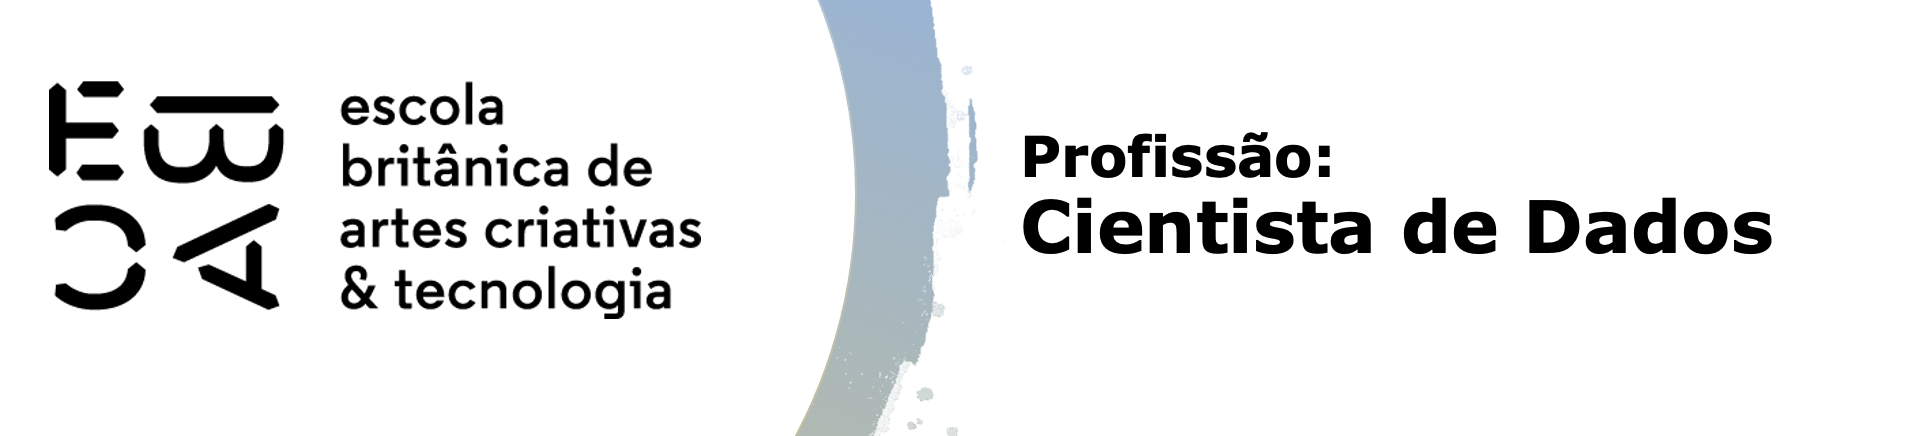

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.tree import export_graphviz
from sklearn.metrics import mean_squared_error

In [2]:
# Carregando a base X_train.csv
X_train = pd.read_csv('X_train.csv')
X_train.head(1)

,ordem,id,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0,1,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.0304,-0.464761,-0.018446,-0.841247,0.179941,-0.058627


In [3]:
# Carregando a base X_test.csv
X_test = pd.read_csv('X_test.csv')
X_test.head(1)

,Unnamed: 0,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",id
0,0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,...,-0.33037,-0.705974,0.006462,0.16292,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2


In [4]:
# Carregando as variáveis y_train e y_test
y_train = pd.read_csv('y_train.txt', names = ['atividade_humana'])
y_test = pd.read_csv('y_test.txt', names = ['atividade_humana'])

In [5]:
# Carregando a base activity_labels.txt em uma Series
df_activity_labels = pd.read_csv('activity_labels.txt', delim_whitespace = True, header=None, names = ['ordem', 'colunas'])
series_activity = df_activity_labels['colunas']

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamos acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [6]:
%%time
# Utilizando as mesmas "3 melhores variáveis" identificadas no exercício anterior.
variaveis = ['tGravityAcc-energy()-X', 'fBodyAcc-mean()-X', 'angle(Y,gravityMean)']
X_train_3 = X_train[variaveis]
y_train_3 = y_train
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train_3, y_train_3)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 0 ns
Wall time: 79.7 ms


In [7]:
%%time
#garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

CPU times: total: 0 ns
Wall time: 0 ns


array([0.00000000e+00, 5.44995104e-06, 6.59151729e-06, 7.01879270e-06,
       1.00688213e-05, 1.13157341e-05, 1.16014850e-05, 1.20819934e-05,
       1.71709922e-05, 2.04026115e-05, 2.18260495e-05, 2.24204522e-05,
       3.49759055e-05, 3.50019444e-05, 3.81726280e-05, 3.84049158e-05,
       3.90792056e-05, 4.14529250e-05, 4.76060936e-05, 4.85876625e-05,
       6.11350980e-05, 6.41224934e-05, 6.43815742e-05, 7.76436703e-05,
       8.49884806e-05, 9.12180251e-05, 9.59158433e-05, 9.65080080e-05,
       9.69088102e-05, 9.86692744e-05, 9.95342357e-05, 1.01346036e-04,
       1.01996980e-04, 1.08813928e-04, 1.23714934e-04, 1.25847466e-04,
       1.50361815e-04, 1.54976359e-04, 1.75326218e-04, 1.84844173e-04,
       1.91557853e-04, 2.06206067e-04, 2.16923939e-04, 2.19877768e-04,
       2.21614574e-04, 2.23514503e-04, 2.32384455e-04, 2.32854113e-04,
       2.34521016e-04, 2.34706577e-04, 2.38283524e-04, 2.41444531e-04,
       2.73146473e-04, 2.73278161e-04, 2.74993939e-04, 3.05982310e-04,
      

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [8]:
%%time
# Utilizando um cross validation do tipo k-fold com k=10
grid_parametros = {'ccp_alpha':ccp_alphas[::10]} # ccp_alphas[::10] = obter elementos no intervalo de 10
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(X_train_3, y_train_3) 

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10; 1/12] START ccp_alpha=0.0.............................................
[CV 1/10; 1/12] END ..............ccp_alpha=0.0;, score=0.730 total time=   0.0s
[CV 2/10; 1/12] START ccp_alpha=0.0.............................................
[CV 2/10; 1/12] END ..............ccp_alpha=0.0;, score=0.751 total time=   0.0s
[CV 3/10; 1/12] START ccp_alpha=0.0.............................................
[CV 3/10; 1/12] END ..............ccp_alpha=0.0;, score=0.815 total time=   0.0s
[CV 4/10; 1/12] START ccp_alpha=0.0.............................................
[CV 4/10; 1/12] END ..............ccp_alpha=0.0;, score=0.702 total time=   0.0s
[CV 5/10; 1/12] START ccp_alpha=0.0.............................................
[CV 5/10; 1/12] END ..............ccp_alpha=0.0;, score=0.785 total time=   0.0s
[CV 6/10; 1/12] START ccp_alpha=0.0.............................................
[CV 6/10; 1/12] END ..............ccp_alpha=0.

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 2.18260495e-05, 6.11350980e-05, 9.95342357e-05,
       1.91557853e-04, 2.38283524e-04, 3.70679206e-04, 6.36021804e-04,
       9.47195622e-04, 1.86307104e-03, 2.51626453e-03, 7.14002125e-02])},
             verbose=100)

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [9]:
%%time
# Gerando DataFrame com o resultado da função do scikitlearn: o GridSearchCV()
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

CPU times: total: 0 ns
Wall time: 6.37 ms


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.034453,0.008305,0.005508,0.006145,0.0,{'ccp_alpha': 0.0},0.72962,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
1,0.033445,0.006893,0.006233,0.006415,0.000022,{'ccp_alpha': 2.182604954829577e-05},0.72962,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
2,0.034387,0.007612,0.005351,0.005729,0.000061,{'ccp_alpha': 6.113509801981983e-05},0.72962,0.751359,0.814966,0.702041,0.785034,0.752381,0.797279,0.714286,0.839456,0.771429,0.765785,0.042014,5
3,0.032668,0.003802,0.004369,0.005057,0.0001,{'ccp_alpha': 9.953423570927358e-05},0.72962,0.751359,0.816327,0.702041,0.783673,0.752381,0.797279,0.714286,0.839456,0.767347,0.765377,0.042078,8
4,0.032735,0.004477,0.004149,0.005502,0.000192,{'ccp_alpha': 0.00019155785273848418},0.72962,0.751359,0.813605,0.704762,0.783673,0.752381,0.798639,0.714286,0.834014,0.767347,0.764969,0.040508,9


In [10]:
%%time
# Escolhendo o melhor 'ccp_alpha' e gerando a árvore de classificação
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, ccp_alpha=melhor_ccp).fit(X_train_3, y_train_3)

CPU times: total: 15.6 ms
Wall time: 79 ms


CPU times: total: 0 ns
Wall time: 66.2 ms


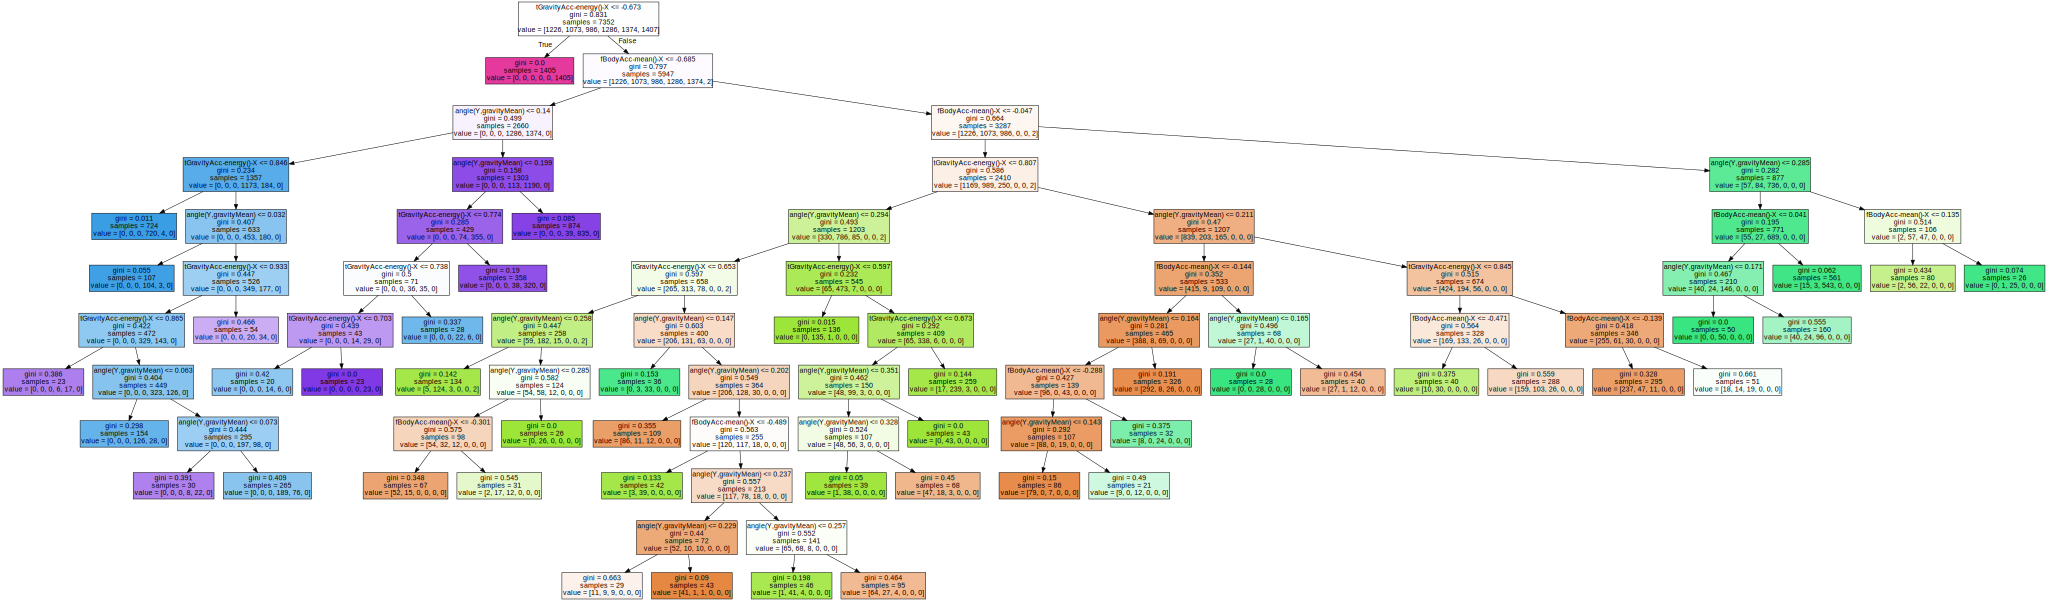

In [11]:
%%time
# Visualizando a árvore de classificação
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train_3.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [12]:
%%time
# Calculando o R-quadrado da árvore de classificação
X_test_3 = X_test[variaveis]
y_test_3 = y_test
print(f"Profundidade: {clf.tree_.max_depth}")
print(f"MSE na base de testes: {mean_squared_error(y_test_3, clf.predict(X_test_3)):.2f}")
print(f"R_quadrado na base de testes: {clf.score(X_test_3, y_test_3):.2f}")

Profundidade: 11
MSE na base de testes: 0.59
R_quadrado na base de testes: 0.69
CPU times: total: 0 ns
Wall time: 27 ms


CPU times: total: 93.8 ms
Wall time: 176 ms


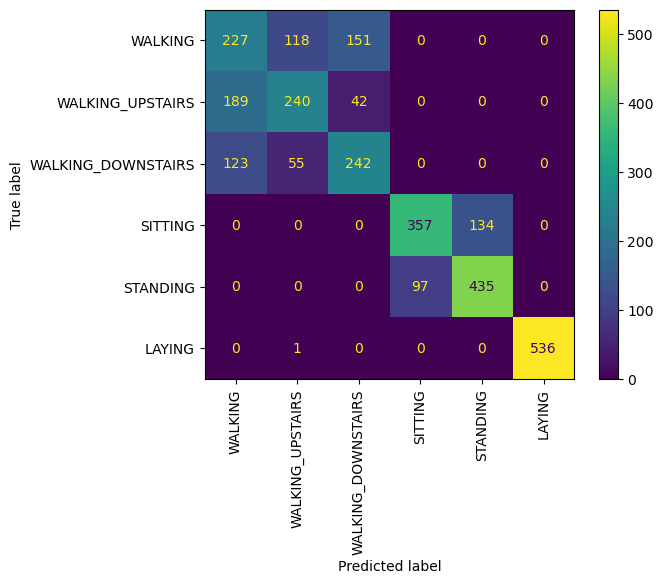

In [13]:
%%time
# Visualizando a matriz de confusão
predictions = clf.predict(X_test_3)
cm = confusion_matrix(y_test_3, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(series_activity))
disp.plot()
ticks = plt.xticks(rotation = 90)

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Faça uma árvore de classificação bem simples para esta variável:
    - utilize ```min_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [14]:
# Criando  uma variável binária para uma das classes de maior erro ('WALKING')
dic = dict(zip(df_activity_labels.ordem, df_activity_labels.colunas))
y_train['atividade_humana_cat'] = y_train['atividade_humana'].map(dic)
y_train_erro = pd.get_dummies(y_train['atividade_humana_cat'])
y_train_erro = y_train_erro['WALKING'].map({False:0, True:1})
y_train_erro.head()

0    0
1    0
2    0
3    0
4    0
Name: WALKING, dtype: int64

In [15]:
clf_erro = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, max_depth=4).fit(X_train, y_train_erro)

In [16]:
# Considerando as 3 variáveis com maior importância para os próximos passos
importances = pd.DataFrame(clf_erro.feature_importances_, index = X_train.columns)
importances = importances[importances!= 0].sort_values([0], ascending = False)
lista = list(importances[:3].index)
lista

['fBodyAccMag-std()', 'tBodyGyroJerk-mad()-X', 'tGravityAcc-arCoeff()-X,1']

In [17]:
%%time
lista_6 = variaveis + lista
X_train_6 = X_train[lista_6]
y_train_6 = y_train['atividade_humana']
caminho = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20).cost_complexity_pruning_path(X_train_6, y_train_6)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

CPU times: total: 15.6 ms
Wall time: 75.2 ms


In [18]:
%%time
#garantindo que os ccp_alphas são únicos e positivos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])
ccp_alphas

CPU times: total: 0 ns
Wall time: 6.9 ms


array([0.00000000e+00, 5.90917125e-06, 6.51809003e-06, 6.96674540e-06,
       8.99098135e-06, 9.29648089e-06, 1.10976257e-05, 1.14254625e-05,
       1.24033497e-05, 1.27326202e-05, 1.32153279e-05, 2.44966679e-05,
       3.07517623e-05, 3.26441785e-05, 3.30210113e-05, 3.71576384e-05,
       4.31423162e-05, 4.35953238e-05, 5.04935355e-05, 5.83543225e-05,
       7.17980465e-05, 8.80851205e-05, 9.32690813e-05, 1.16790263e-04,
       1.24219290e-04, 1.39255920e-04, 1.95936162e-04, 2.03407456e-04,
       2.76980908e-04, 2.99219969e-04, 3.25436438e-04, 3.58403097e-04,
       3.96681532e-04, 4.03930491e-04, 4.32183768e-04, 4.35255713e-04,
       4.37482193e-04, 4.56427055e-04, 4.78340798e-04, 4.82621128e-04,
       4.84469729e-04, 4.87601807e-04, 4.94486550e-04, 4.95620021e-04,
       4.98617779e-04, 6.05919705e-04, 6.26827889e-04, 6.39584089e-04,
       6.56477340e-04, 6.72123615e-04, 6.88500974e-04, 7.86733061e-04,
       8.08668843e-04, 8.14082323e-04, 8.80578664e-04, 9.67673742e-04,
      

In [19]:
%%time
# Utilizando um cross validation do tipo k-fold com k=10
grid_parametros = {'ccp_alpha':ccp_alphas[::10]} # ccp_alphas[::10] = obter elementos no intervalo de 10
clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20)
grid = GridSearchCV(estimator = clf, param_grid=grid_parametros,cv=10, verbose=100)
grid.fit(X_train_6, y_train_6) 

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10; 1/9] START ccp_alpha=0.0..............................................
[CV 1/10; 1/9] END ...............ccp_alpha=0.0;, score=0.864 total time=   0.0s
[CV 2/10; 1/9] START ccp_alpha=0.0..............................................
[CV 2/10; 1/9] END ...............ccp_alpha=0.0;, score=0.871 total time=   0.0s
[CV 3/10; 1/9] START ccp_alpha=0.0..............................................
[CV 3/10; 1/9] END ...............ccp_alpha=0.0;, score=0.865 total time=   0.0s
[CV 4/10; 1/9] START ccp_alpha=0.0..............................................
[CV 4/10; 1/9] END ...............ccp_alpha=0.0;, score=0.790 total time=   0.0s
[CV 5/10; 1/9] START ccp_alpha=0.0..............................................
[CV 5/10; 1/9] END ...............ccp_alpha=0.0;, score=0.800 total time=   0.0s
[CV 6/10; 1/9] START ccp_alpha=0.0..............................................
[CV 6/10; 1/9] END ...............ccp_alpha=0.0;

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(min_samples_leaf=20,
                                              random_state=2360873),
             param_grid={'ccp_alpha': array([0.00000000e+00, 1.32153279e-05, 7.17980465e-05, 3.25436438e-04,
       4.84469729e-04, 6.88500974e-04, 1.33321451e-03, 3.03806917e-03,
       1.01101894e-02])},
             verbose=100)

In [20]:
%%time
# Gerando DataFrame com o resultado da função do scikitlearn: o GridSearchCV()
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

CPU times: total: 0 ns
Wall time: 10 ms


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.049166,0.006253,0.006317,0.006038,0.0,{'ccp_alpha': 0.0},0.86413,0.870924,0.865306,0.790476,0.800000,0.850340,0.885714,0.850340,0.914286,0.834014,0.852553,0.035375,6
1,0.059722,0.010646,0.001253,0.003760,0.000013,{'ccp_alpha': 1.3215327925611268e-05},0.86413,0.870924,0.865306,0.790476,0.800000,0.850340,0.885714,0.850340,0.914286,0.834014,0.852553,0.035375,6
2,0.056410,0.009080,0.002366,0.005033,0.000072,{'ccp_alpha': 7.179804645493146e-05},0.86413,0.870924,0.865306,0.790476,0.800000,0.850340,0.885714,0.850340,0.914286,0.834014,0.852553,0.035375,6
3,0.052495,0.007311,0.003681,0.005136,0.000325,{'ccp_alpha': 0.0003254364384728209},0.86413,0.870924,0.865306,0.790476,0.800000,0.850340,0.887075,0.850340,0.914286,0.834014,0.852689,0.035504,4
4,0.055346,0.012223,0.004305,0.005944,0.000484,{'ccp_alpha': 0.0004844697290666616},0.86413,0.862772,0.865306,0.791837,0.806803,0.870748,0.887075,0.829932,0.912925,0.834014,0.852554,0.034934,5


In [21]:
%%time
# Escolhendo o melhor 'ccp_alpha' e gerando a nova árvore de classificação
melhor_ccp = resultados.iloc[grid.best_index_,4]

clf = DecisionTreeClassifier(random_state=2360873, min_samples_leaf=20, ccp_alpha=melhor_ccp).fit(X_train_6, y_train_6)

CPU times: total: 46.9 ms
Wall time: 83.3 ms


CPU times: total: 0 ns
Wall time: 27.3 ms


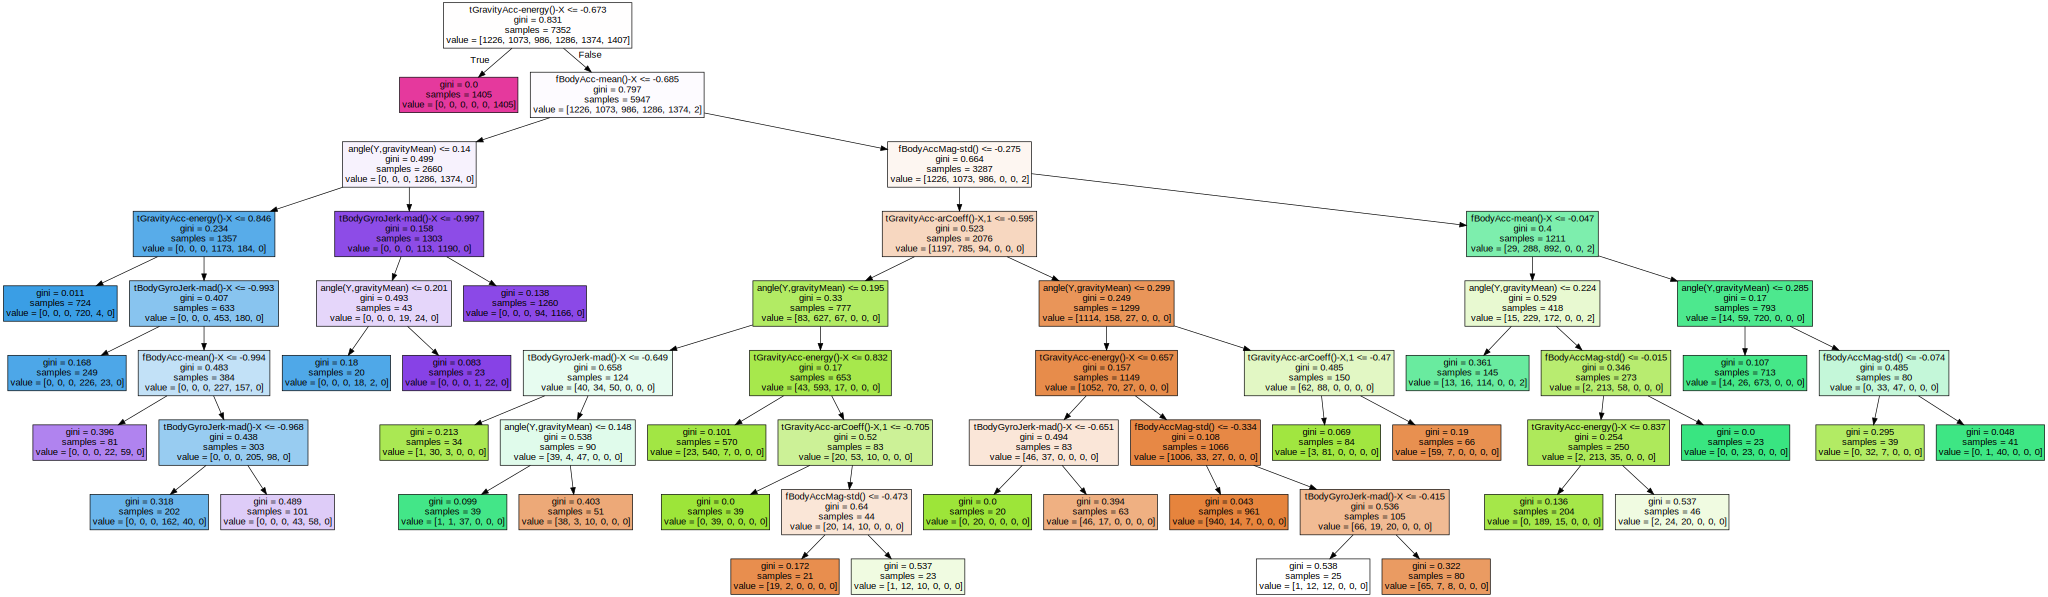

In [22]:
%%time
# Visualizando a nova árvore de classificação
# DOT data
dot_data = export_graphviz(clf, out_file=None, 
                                feature_names=X_train_6.columns,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [23]:
%%time
# Calculando o R-quadrado da árvore de classificação
X_test_6 = X_test[lista_6]
y_test_6 = y_test
print(f"Profundidade: {clf.tree_.max_depth}")
print(f"MSE na base de testes: {mean_squared_error(y_test_6, clf.predict(X_test_6)):.2f}")
print(f"R_quadrado na base de testes: {clf.score(X_test_6, y_test_6):.2f}")

Profundidade: 8
MSE na base de testes: 0.21
R_quadrado na base de testes: 0.84
CPU times: total: 0 ns
Wall time: 22.1 ms


CPU times: total: 62.5 ms
Wall time: 144 ms


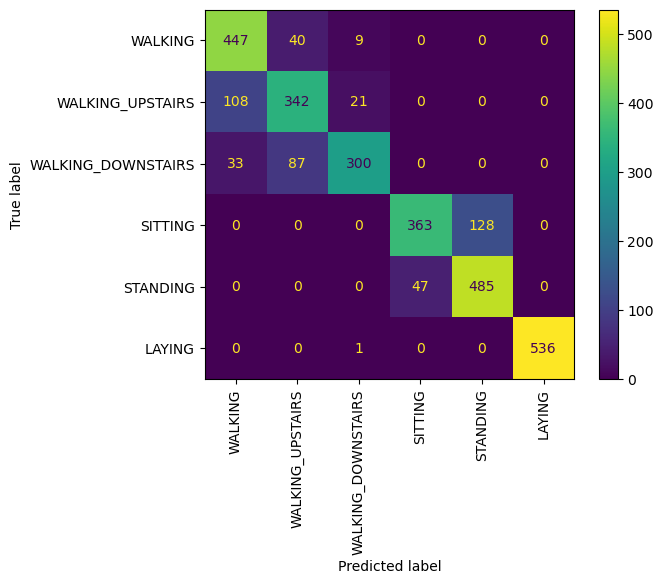

In [24]:
%%time
# Visualizando a matriz de confusão
predictions = clf.predict(X_test_6)
cm = confusion_matrix(y_test_6, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(series_activity))
disp.plot()
ticks = plt.xticks(rotation = 90)

#### <span style="color:blue">Análise:</span>
* Após inclusão das 03 (três) variáveis de maior importância para a variável resposta <span style="color:red">**WALKING**</span>,na nova árvore de classificação, o **R_quadrado** apresentou melhora de aproximadamente **15 pontos percentuais**, saíndo de **69%** para <span style="color:blue">**84%**</span>.
   